## Importing the necessary library

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2 # open-cv used for image processing
%matplotlib inline
from tqdm import tqdm
import keras.utils as image
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report


!pip install opencv-python

## Directory assignment

In [2]:
train_dir = r"C:\Users\ayour\Downloads\AI PROJECT\Emergency_Vehicles\train"
test_dir = r"C:\Users\ayour\Downloads\AI PROJECT\Emergency_Vehicles\test"


## Reading the first image

In [3]:
image = cv2.imread(r"C:\Users\ayour\Downloads\AI PROJECT\Emergency_Vehicles\train\1.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # converting to RGB

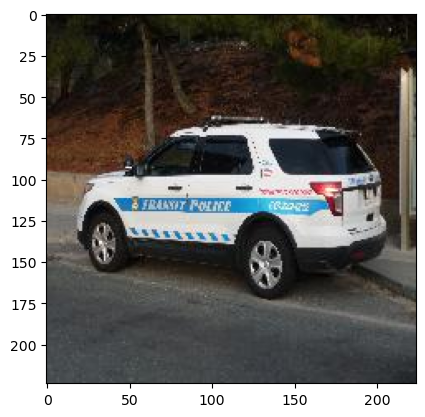

In [4]:
plt.imshow(image)

In [5]:
image.shape # This shows the shape of the image (length, width,chanel)

(224, 224, 3)

## Preprocessing

For preprocessing, the ImageDataGenerator is used. It is used for the generation of batches containing the data of tensor images and is
used in the domain of real-time data augmentation.


In [6]:
from keras.preprocessing.image import ImageDataGenerator # Keras image data generator is used for the generation

In [7]:
# Here we are applying our desired transformations
image_gen = ImageDataGenerator(
            rotation_range=20,# specifies the rotation to be 20%
            width_shift_range=0.1, # specifies the width shift of 10%
            height_shift_range=0.1,# specifies the height shift of 10%
            shear_range=0.20, # crops part of the image
            zoom_range=0.20, # #zooms the image by 20%
            fill_mode='nearest', # fills using the nearest pixel
            horizontal_flip=True, # Secifies the horizontal flip
            rescale=1/255 # scales the image
)


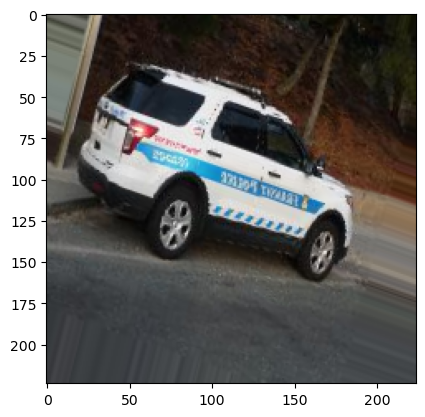

In [8]:
# showing the transformation
plt.imshow(image_gen.random_transform(image))

In [9]:
train_df=pd.read_csv(r"C:\Users\ayour\Downloads\AI PROJECT\Emergency_Vehicles\train.csv")
test_df=pd.read_csv(r"C:\Users\ayour\Downloads\AI PROJECT\Emergency_Vehicles\test.csv")

In [10]:
train_df

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
...,...,...
1641,1638.jpg,0
1642,1095.jpg,0
1643,1130.jpg,0
1644,1294.jpg,0


In [11]:
train_df['emergency_or_not']=train_df['emergency_or_not'].astype(str)
test_df['emergency_or_not']=test_df['emergency_or_not'].astype(str)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       1646 non-null   object
 1   emergency_or_not  1646 non-null   object
dtypes: object(2)
memory usage: 25.8+ KB


In [13]:
train_generator=image_gen.flow_from_dataframe(dataframe=train_df[:1150], # specify the dataset used for trainin
 directory=train_dir, # specify the path to the directory
 x_col='image_names', # specify the names of the images
 y_col='emergency_or_not', # specifies the class labels
 class_mode='binary', # specifies the kind of classification
 target_size=(224,224), # specifies the dimension to resize the im
 batch_size=50# defines the batch size
 )
validation_generator=image_gen.flow_from_dataframe(dataframe=train_df[1150:], # specify the dataset used for tr
 directory=train_dir, # specify the path to the directory
 x_col='image_names', # specify the names of the images
 y_col='emergency_or_not', # specifies the class labels
 class_mode='binary', # specifies the kind of classification
 target_size=(224,224), # specifies the dimension to resize the im
 batch_size=50 # defines the batch size
 ) 


Found 1150 validated image filenames belonging to 2 classes.
Found 496 validated image filenames belonging to 2 classes.


## Constructor stage

In [14]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization

In [15]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(BatchNormalization()) 
 
model.add(Flatten()) 
 
model.add(Dense(50,activation = 'relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(1,activation = 'sigmoid')) 

## Compilation stage


In [16]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

## Training stage

In [18]:
history=model.fit_generator(train_generator,epochs = 30,validation_data = validation_generator)

C:\Users\ayour\AppData\Local\Temp\ipykernel_22976\926269239.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,epochs = 30,validation_data = validation_generator)


Epoch 1/30
23/23 [==============================] - 38s 2s/step - loss: 0.7353 - accuracy: 0.6478 - val_loss: 0.6640 - val_accuracy: 0.6371
Epoch 2/30
23/23 [==============================] - 37s 2s/step - loss: 0.6044 - accuracy: 0.6948 - val_loss: 0.6723 - val_accuracy: 0.6190
Epoch 3/30
23/23 [==============================] - 39s 2s/step - loss: 0.5391 - accuracy: 0.7330 - val_loss: 0.6524 - val_accuracy: 0.6532
Epoch 4/30
23/23 [==============================] - 38s 2s/step - loss: 0.5281 - accuracy: 0.7548 - val_loss: 0.6349 - val_accuracy: 0.6290
Epoch 5/30
23/23 [==============================] - 37s 2s/step - loss: 0.4838 - accuracy: 0.7783 - val_loss: 0.6388 - val_accuracy: 0.6089
Epoch 6/30
23/23 [==============================] - 38s 2s/step - loss: 0.4848 - accuracy: 0.7661 - val_loss: 0.6211 - val_accuracy: 0.6109
Epoch 7/30
23/23 [==============================] - 38s 2s/step - loss: 0.4351 - accuracy: 0.7948 - val_loss: 0.6187 - val_accuracy: 0.7359
Epoch 8/30
23/23 [==

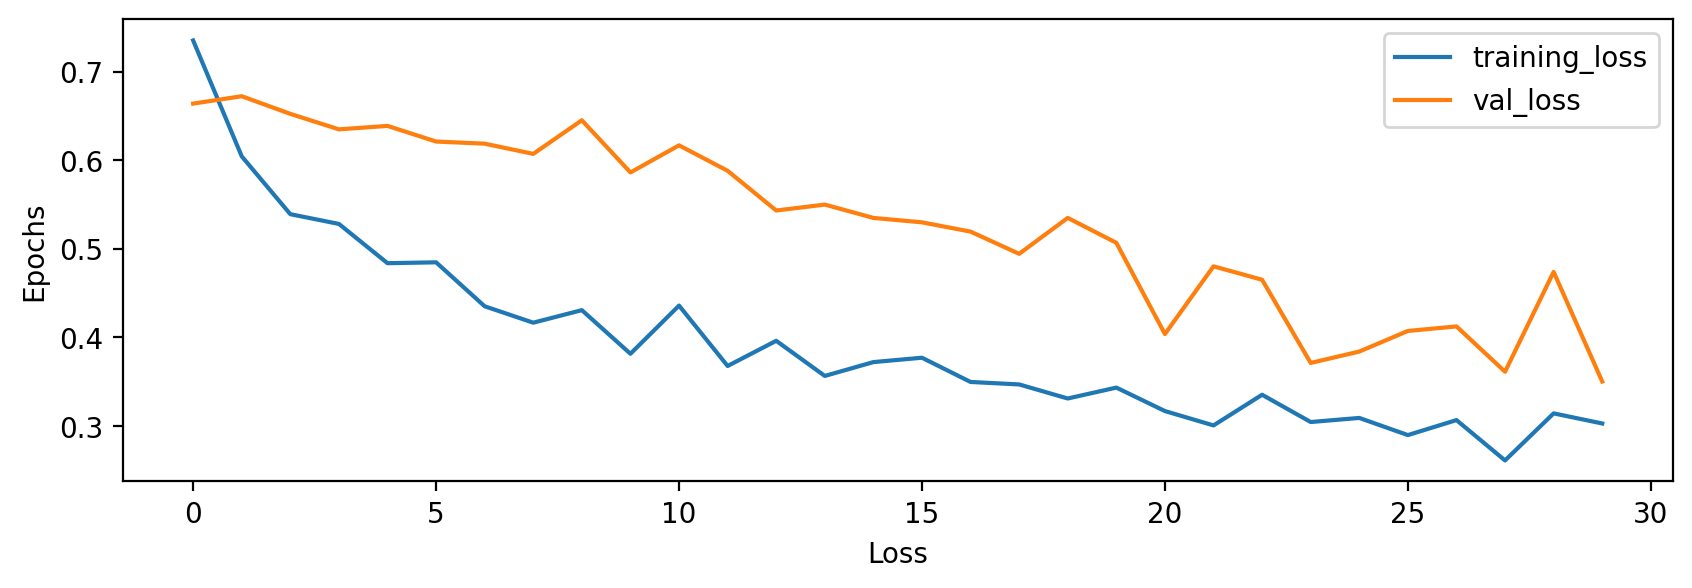

In [19]:
## checking for overfitting
history_df = pd.DataFrame(history.history)
plt.figure(dpi=200, figsize = (10,3))
plt.plot(history_df['loss'],
 label='training_loss')
plt.plot(history_df['val_loss'],
 label='val_loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

## Evaluation stage

In [20]:
test_generator=image_gen.flow_from_dataframe(dataframe=test_df, # specify the dataset used for training
 directory=test_dir, # specify the path to the directory
 x_col='image_names', # specify the names of the images
 #y_col='emergency_or_not', # specifies the class labels
 class_mode=None, # specifies the kind of classification
 target_size=(224,224), # specifies the dimension to resize the image
 batch_size=1 # defines the batch size

 )

test_validation_generator=image_gen.flow_from_dataframe(dataframe=test_df, # specify the dataset used for tr
 directory=test_dir, # specify the path to the directory
 x_col='image_names', # specify the names of the images
 y_col='emergency_or_not', # specifies the class labels
 class_mode='binary', # specifies the kind of classification
 target_size=(224,224), # specifies the dimension to resize the image
 batch_size=50 # defines the batch size
 ) 

Found 706 validated image filenames.
Found 706 validated image filenames belonging to 2 classes.


## Think on how to evaluate your model on the test dataset. Refer to last lab!

In [21]:
model.evaluate(test_validation_generator)

15/15 [==============================] - 12s 783ms/step - loss: 0.3229 - accuracy: 0.8640


[0.3228982985019684, 0.8640226721763611]

In [22]:
pred=model.predict(test_generator)

706/706 [==============================] - 28s 39ms/step


In [23]:
test_df.head()

,image_names,emergency_or_not
0,1960.jpg,0
1,668.jpg,1
2,2082.jpg,0
3,808.jpg,1
4,1907.jpg,0


In [24]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       706 non-null    object
 1   emergency_or_not  706 non-null    object
dtypes: object(2)
memory usage: 11.2+ KB


In [25]:
test_df.index

RangeIndex(start=0, stop=706, step=1)

In [26]:
import tensorflow_hub as hub

In [27]:
#save model
from tensorflow.keras.models import load_model
model.save('vechile.h5')
model_vechile = load_model(('vechile.h5'),custom_objects={'KerasLayer':hub.KerasLayer})

1/1 [==============================] - 0s 173ms/step
Energence Vechicle


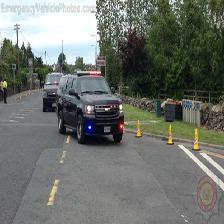

In [28]:
# Part 4 - Making a single prediction
from IPython.display import Image
import numpy as np
from tensorflow.keras.preprocessing import image
image_name = r"C:\Users\ayour\Downloads\AI PROJECT\Emergency_Vehicles\test\668.jpg"
test_image = image.load_img(image_name, target_size = (224,224)) #formobilenet
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model_vechile.predict(test_image)
# print(result)
if result > 0.5:
    print("Energence Vechicle")
else:
    print("Normal Vechicle")

Image(filename=image_name) 